In [1]:
import os, sys
import pyspark
import pyspark.sql
from pyspark.sql import Row

sc = False
spark = False
def stop_spark():
    global sc
    sc.stop()
    print("PySpark stopped...")

def start_spark(cores):
    global sc
    global spark
    os.environ["JAVA_HOME"]="/lrz/sys/compilers/java/jdk1.8.0_112"
    APP_NAME = "PySpark Lecture"
    SPARK_MASTER="local["+ cores + "]"
    conf=pyspark.SparkConf()
    conf=pyspark.SparkConf().setAppName(APP_NAME).set("spark.local.dir", os.path.join(os.getcwd(), "tmp"))
    sc    = pyspark.SparkContext(master=SPARK_MASTER, conf=conf)
    spark = pyspark.sql.SparkSession(sc).builder.appName(APP_NAME).getOrCreate()
    print("PySpark initiated...")
    
file = "/naslx/projects/pn69si/mnmda001/students/data/nasa/NASA_access_log_Jul95"
file

'/naslx/projects/pn69si/mnmda001/students/data/nasa/NASA_access_log_Jul95'

In [2]:
start_spark("1")

PySpark initiated...


In [3]:
import time

#5.2 Create a Spark-SQL table with fields for IP/Host and Response Code from the NASA Log file! 
def nasa_to_row(line):
    parts = line.split(" ")
    r = -1
    if len(parts) < 9:
        r = -1
    else:
        r = parts[len(parts)-2]
    row = Row(
      ip=parts[0],
      resp=r
    )
    return row
# Load the text file using the SparkContext
nasa = sc.textFile(file)
rows = nasa.map(nasa_to_row)
df = rows.toDF()

#5.4 Cachen Sie den Dataframe und führen Sie dieselbe Query nochmals aus! Messen Sie die Laufzeit für das Cachen und für die Ausführungszeit der Query!
start = time.time()
df.cache()
exe = time.time()-start
print ("Cache op took: " + str(exe) + " Seconds")

start = time.time()
df.registerTempTable("nasa")

#5.3 Run an SQL query that outputs the number of occurrences of each HTTP response code!
# Generate a new DataFrame with SQL using the SparkSession
nasa_count = spark.sql("""
SELECT
  resp,
  count(*) as Count
  FROM nasa
  where resp is not null
  group by resp
""")
nasa_count.show()
exe = time.time()-start
print ("Query took: " + str(exe) + " Seconds")

start = time.time()
nasa_count = spark.sql("""
SELECT
  resp,
  count(*) as Count
  FROM nasa
  where resp is not null
  group by resp
""")
nasa_count.show()
exe = time.time()-start
print ("Cached Query took: " + str(exe) + " Seconds")

# Go back to an RDD
#job_counts.rdd.collect()

df

Cache op took: 0.19225025177001953 Seconds
+----+-------+
|resp|  Count|
+----+-------+
|  -1|      6|
| 200|1701534|
| 302|  46573|
| 501|     14|
| 404|  10845|
| 403|     54|
| 500|     62|
| 304| 132627|
+----+-------+

Query took: 32.78731918334961 Seconds
+----+-------+
|resp|  Count|
+----+-------+
|  -1|      6|
| 200|1701534|
| 302|  46573|
| 501|     14|
| 404|  10845|
| 403|     54|
| 500|     62|
| 304| 132627|
+----+-------+

Cached Query took: 1.7165312767028809 Seconds


DataFrame[ip: string, resp: string]

In [4]:
#5.5. Implement the same Query using the Dataframe API!

# Load the text file using the SparkContext
nasa = sc.textFile(file)
rows = nasa.map(nasa_to_row)
#rows.first()
df = rows.toDF()

# Go back to an RDD
#job_counts.rdd.collect()

test = df.groupBy('resp').agg({'resp': 'count'})
test.show()
print("done")

+----+-----------+
|resp|count(resp)|
+----+-----------+
|  -1|          6|
| 200|    1701534|
| 302|      46573|
| 501|         14|
| 404|      10845|
| 403|         54|
| 500|         62|
| 304|     132627|
+----+-----------+

done


PySpark stopped...
PySpark initiated...
+----+-----------+
|resp|count(resp)|
+----+-----------+
|  -1|          6|
| 200|    1701534|
| 302|      46573|
| 501|         14|
| 404|      10845|
| 403|         54|
| 500|         62|
| 304|     132627|
+----+-----------+

+----+-----------+
|resp|count(resp)|
+----+-----------+
|  -1|          6|
| 200|    1701534|
| 302|      46573|
| 501|         14|
| 404|      10845|
| 403|         54|
| 500|         62|
| 304|     132627|
+----+-----------+

PySpark stopped...
PySpark initiated...
+----+-----------+
|resp|count(resp)|
+----+-----------+
|  -1|          6|
| 200|    1701534|
| 302|      46573|
| 501|         14|
| 404|      10845|
| 403|         54|
| 500|         62|
| 304|     132627|
+----+-----------+

+----+-----------+
|resp|count(resp)|
+----+-----------+
|  -1|          6|
| 200|    1701534|
| 302|      46573|
| 501|         14|
| 404|      10845|
| 403|         54|
| 500|         62|
| 304|     132627|
+----+-----------+



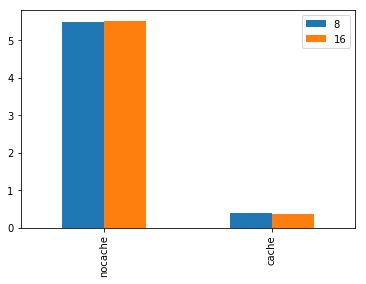

In [8]:
#5.6 Führen Sie diesselbe Query mit/ohne Cache und 8, 16 Cores aus! Dokumentieren und erklären Sie das Ergebnis!
import pandas as pd


# Load the text file using the SparkContext
t = [0,0,0,0]

stop_spark()
start_spark("8")
nasa8 = sc.textFile(file)
rows8 = nasa8.map(nasa_to_row)
df8 = rows8.toDF()
df8.cache()

start = time.time()
res = df8.groupBy('resp').agg({'resp': 'count'})
res.show()
t[0] = time.time()-start

start = time.time()
res = df8.groupBy('resp').agg({'resp': 'count'})
res.show()
t[2] = time.time()-start

stop_spark()
start_spark("16")

nasa16 = sc.textFile(file)
rows16 = nasa16.map(nasa_to_row)
df16 = rows16.toDF()
df16.cache()


start = time.time()
res = df16.groupBy('resp').agg({'resp': 'count'})
res.show()
t[1] = time.time()-start

start = time.time()
res = df16.groupBy('resp').agg({'resp': 'count'})
res.show()
t[3] = time.time()-start

t
layout = {'8': [float(t[0]),float(t[2])],
         '16': [float(t[1]),float(t[3])]}
df = pd.DataFrame(layout,index = ['nocache', 'cache'])
df
#test = df.groupBy('resp').agg({'resp': 'count'})
df.plot.bar()
#res = pd.DataFrame({'Runtime in Sec': t},index = ['Generate', 'Sort','Validate'])

PySpark stopped...
PySpark initiated...
PySpark stopped...
PySpark initiated...


DataFrame[resp: string, count(resp): bigint]

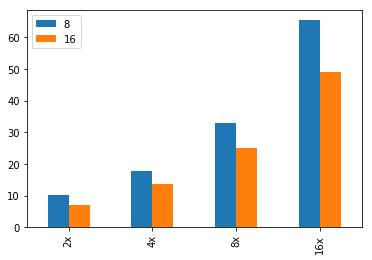

In [6]:
#5.7 Performance Analysis:
#* Create RDDs with 2x, 4x, 8x and 16x of the size of the NASA log dataset! Persist the dataset in the Spark Cache! Use an appropriate number of cores (e.g. 8 or 16)!
#* Measure and plot the response times for all datasets using a constant number of cores!
#* Plot the results!
#* Explain the results!
def eval_runtime(rows):
    df = rows.toDF()
    df.cache()
    df.persist()
    start = time.time()
    test = df.groupBy('resp').agg({'resp': 'count'})
    test.collect()
    return time.time()-start

stop_spark()
start_spark("8")
nasa8 = sc.textFile(file)
rows = nasa8.map(nasa_to_row)
rows8_2 = rows.union(rows)
rows8_4 = rows8_2.union(rows8_2)
rows8_8 = rows8_4.union(rows8_4)
rows8_16 = rows8_8.union(rows8_8)

a = eval_runtime(rows8_2)
b = eval_runtime(rows8_4)
c = eval_runtime(rows8_8)
d = eval_runtime(rows8_16)

layout = {'8': [float(a),float(b),float(c),float(d)]}

stop_spark()
start_spark("16")
nasa8 = sc.textFile(file)
rows = nasa8.map(nasa_to_row)
rows8_2 = rows.union(rows)
rows8_4 = rows8_2.union(rows8_2)
rows8_8 = rows8_4.union(rows8_4)
rows8_16 = rows8_8.union(rows8_8)

a = eval_runtime(rows8_2)
b = eval_runtime(rows8_4)
c = eval_runtime(rows8_8)
d = eval_runtime(rows8_16)
layout['16'] = [float(a),float(b),float(c),float(d)]

df = pd.DataFrame(layout,index = ['2x', '4x','8x','16x'])
df
#test = df.groupBy('resp').agg({'resp': 'count'})
df.plot.bar()
res


5.8 Strong Scaling
* Measure the runtime for the query for 8, 16, 32, 64, 128, 256 cores for 1x and 16x datasets! Datasets cached in Memory!
* Compute the speedup and efficiency!
* Plot the responses!
* Explain the results!

PySpark stopped...
PySpark initiated...
PySpark stopped...
PySpark initiated...
PySpark stopped...
PySpark initiated...
PySpark stopped...
PySpark initiated...
PySpark stopped...
PySpark initiated...


DataFrame[resp: string, count(resp): bigint]

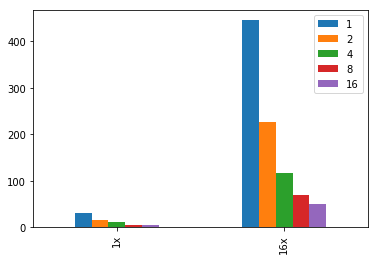

In [7]:
def eval_runtime(rows):
    df = rows.toDF()
    df.cache()
    df.persist()
    start = time.time()
    test = df.groupBy('resp').agg({'resp': 'count'})
    test.collect()
    return time.time()-start

layout = {}

stop_spark()
start_spark("1")
nasa8 = sc.textFile(file)
rows = nasa8.map(nasa_to_row)
rows8_2 = rows.union(rows)
rows8_4 = rows8_2.union(rows8_2)
rows8_8 = rows8_4.union(rows8_4)
rows8_16 = rows8_8.union(rows8_8)

a = eval_runtime(rows)
b = eval_runtime(rows8_16)

layout['1'] = [float(a),float(b)]

stop_spark()
start_spark("2")
nasa8 = sc.textFile(file)
rows = nasa8.map(nasa_to_row)
rows8_2 = rows.union(rows)
rows8_4 = rows8_2.union(rows8_2)
rows8_8 = rows8_4.union(rows8_4)
rows8_16 = rows8_8.union(rows8_8)

a = eval_runtime(rows)
b = eval_runtime(rows8_16)

layout['2'] = [float(a),float(b)]

stop_spark()
start_spark("4")
nasa8 = sc.textFile(file)
rows = nasa8.map(nasa_to_row)
rows8_2 = rows.union(rows)
rows8_4 = rows8_2.union(rows8_2)
rows8_8 = rows8_4.union(rows8_4)
rows8_16 = rows8_8.union(rows8_8)

a = eval_runtime(rows)
b = eval_runtime(rows8_16)

layout['4'] = [float(a),float(b)]

stop_spark()
start_spark("8")
nasa8 = sc.textFile(file)
rows = nasa8.map(nasa_to_row)
rows8_2 = rows.union(rows)
rows8_4 = rows8_2.union(rows8_2)
rows8_8 = rows8_4.union(rows8_4)
rows8_16 = rows8_8.union(rows8_8)

a = eval_runtime(rows)
b = eval_runtime(rows8_16)

layout['8'] = [float(a),float(b)]

stop_spark()
start_spark("16")
nasa8 = sc.textFile(file)
rows = nasa8.map(nasa_to_row)
rows8_2 = rows.union(rows)
rows8_4 = rows8_2.union(rows8_2)
rows8_8 = rows8_4.union(rows8_4)
rows8_16 = rows8_8.union(rows8_8)

a = eval_runtime(rows)
b = eval_runtime(rows8_16)

layout['16'] = [float(a),float(b)]
layout

df = pd.DataFrame(layout,index = ['1x', '16x'])
df
#test = df.groupBy('resp').agg({'resp': 'count'})
df.plot.bar()
res
